In [ ]:
#------------Checking the z-shift bins------------

#import stuff
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
from astropy.table import Table, join

#bins to make: 
#1) z = 0.75-1.25 (you can label this z~1)
#2) z=1.25-1.75 (z~1.5)
#3) z=1.75-2.25 (z~2)

#zCOS = [0,265,507,len(t['zbest'])]
#zEDS = [0,241,640,len(t['zbest'])]
#zGDS = [0,119,279,len(t['zbest'])]
#zUDS = [0,187,472,len(t['zbest'])]

t = ascii.read('EGS_z.txt')
t.sort('zbest')

for i in range(len(t['zbest'])): 
    if t[i]['zbest'] >= 1.25: 
        print i
        break

for i in range(len(t['zbest'])): 
    if t[i]['zbest'] >= 1.75: 
        print i
        break
        
print len(t['zbest'])

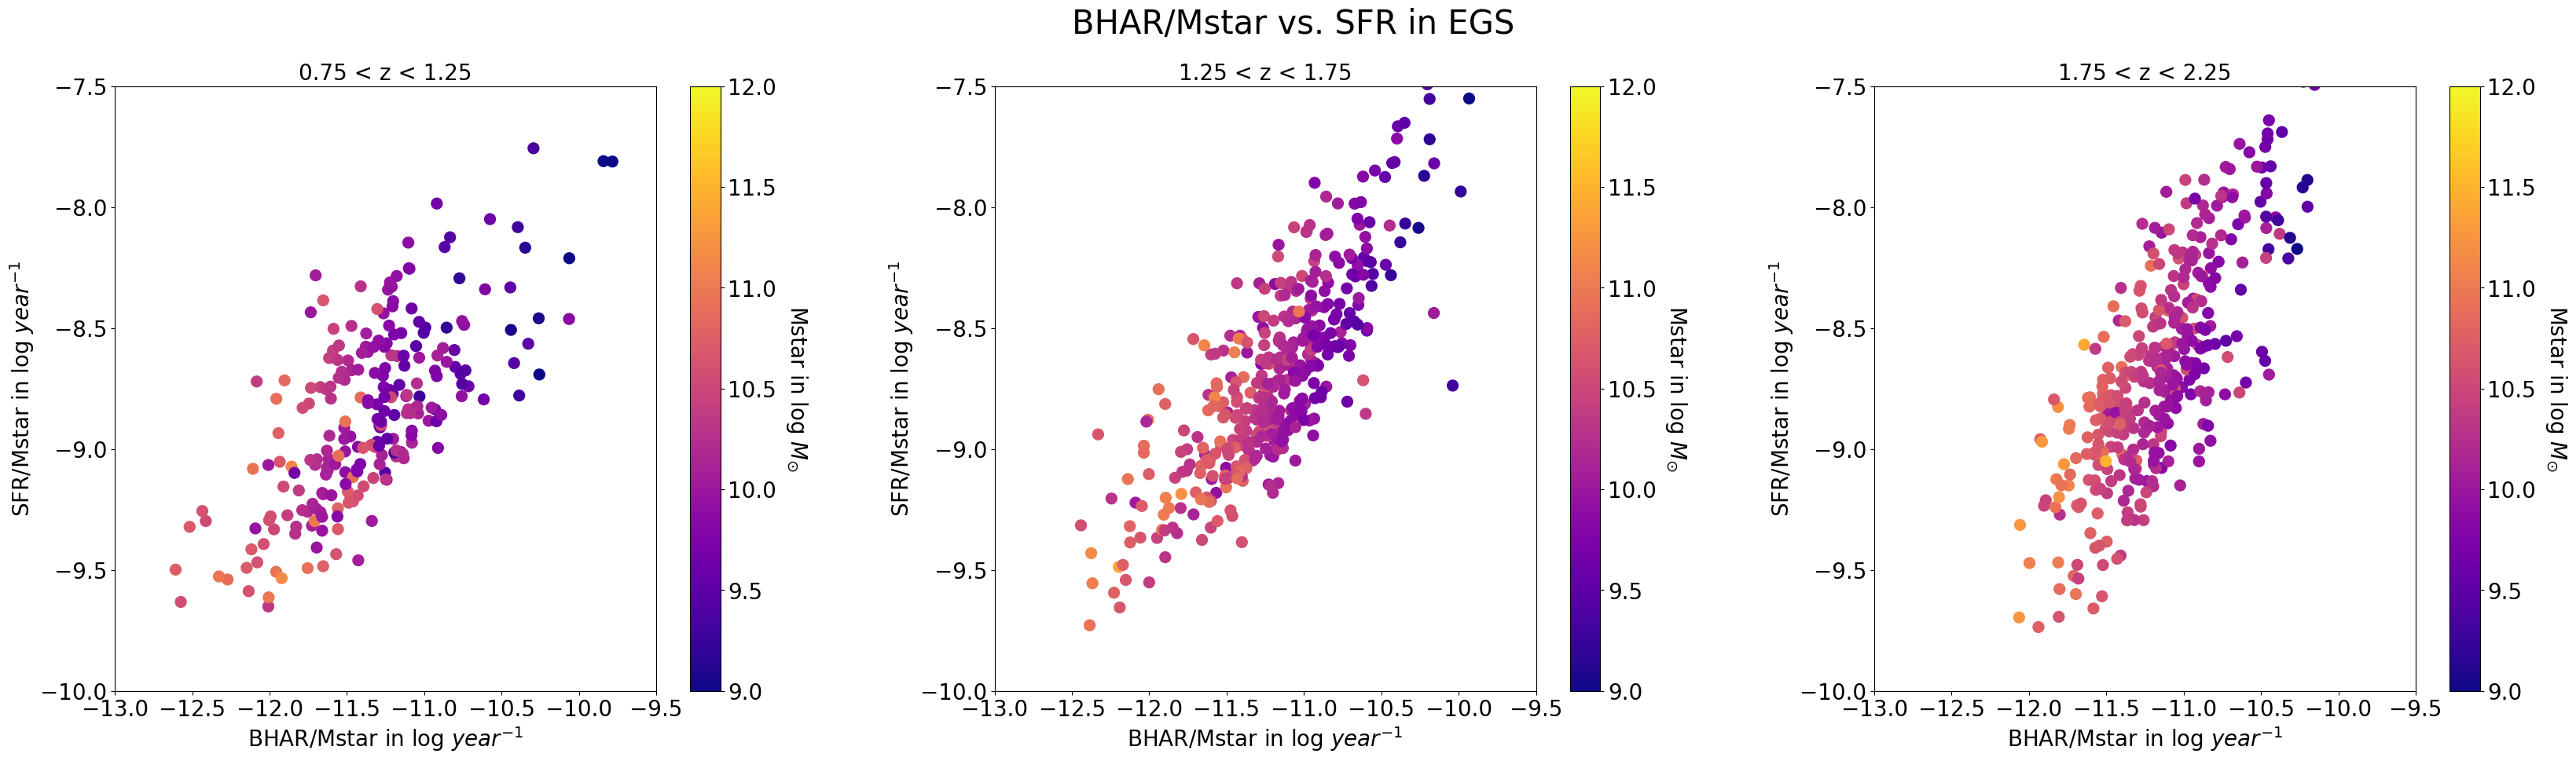

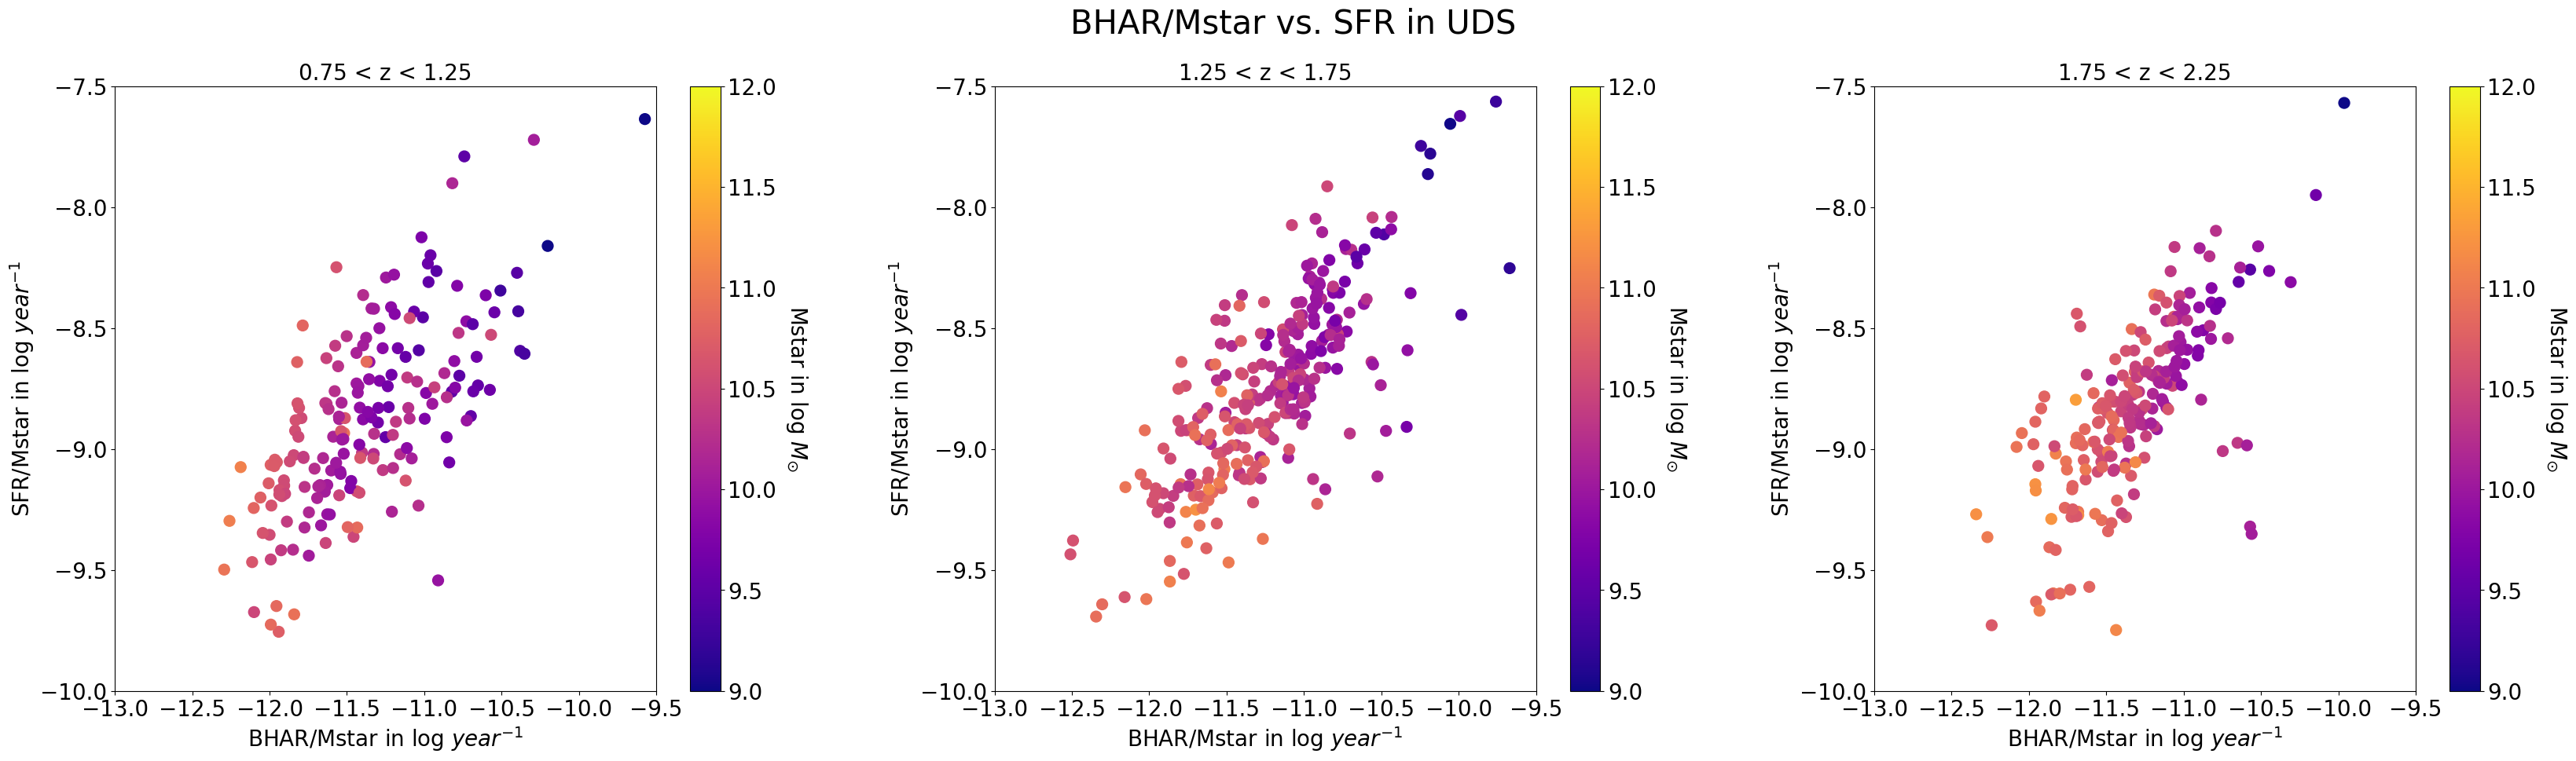

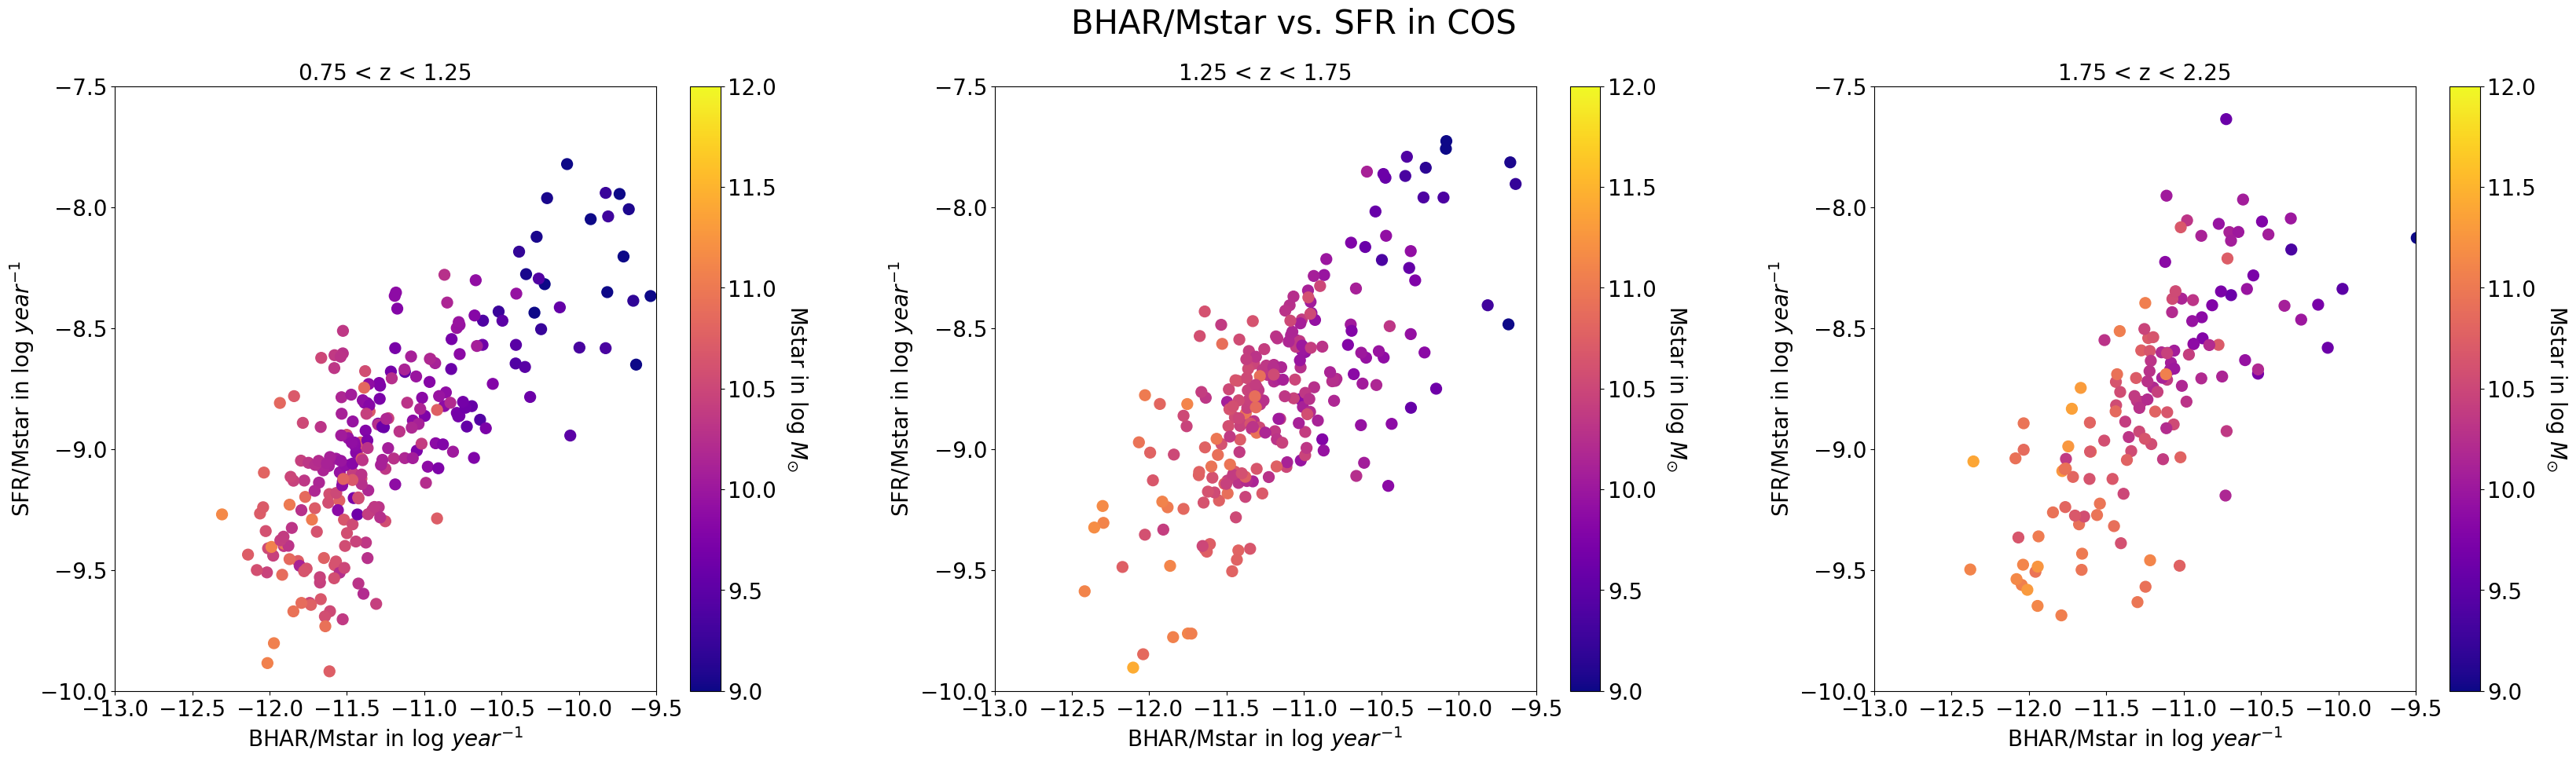

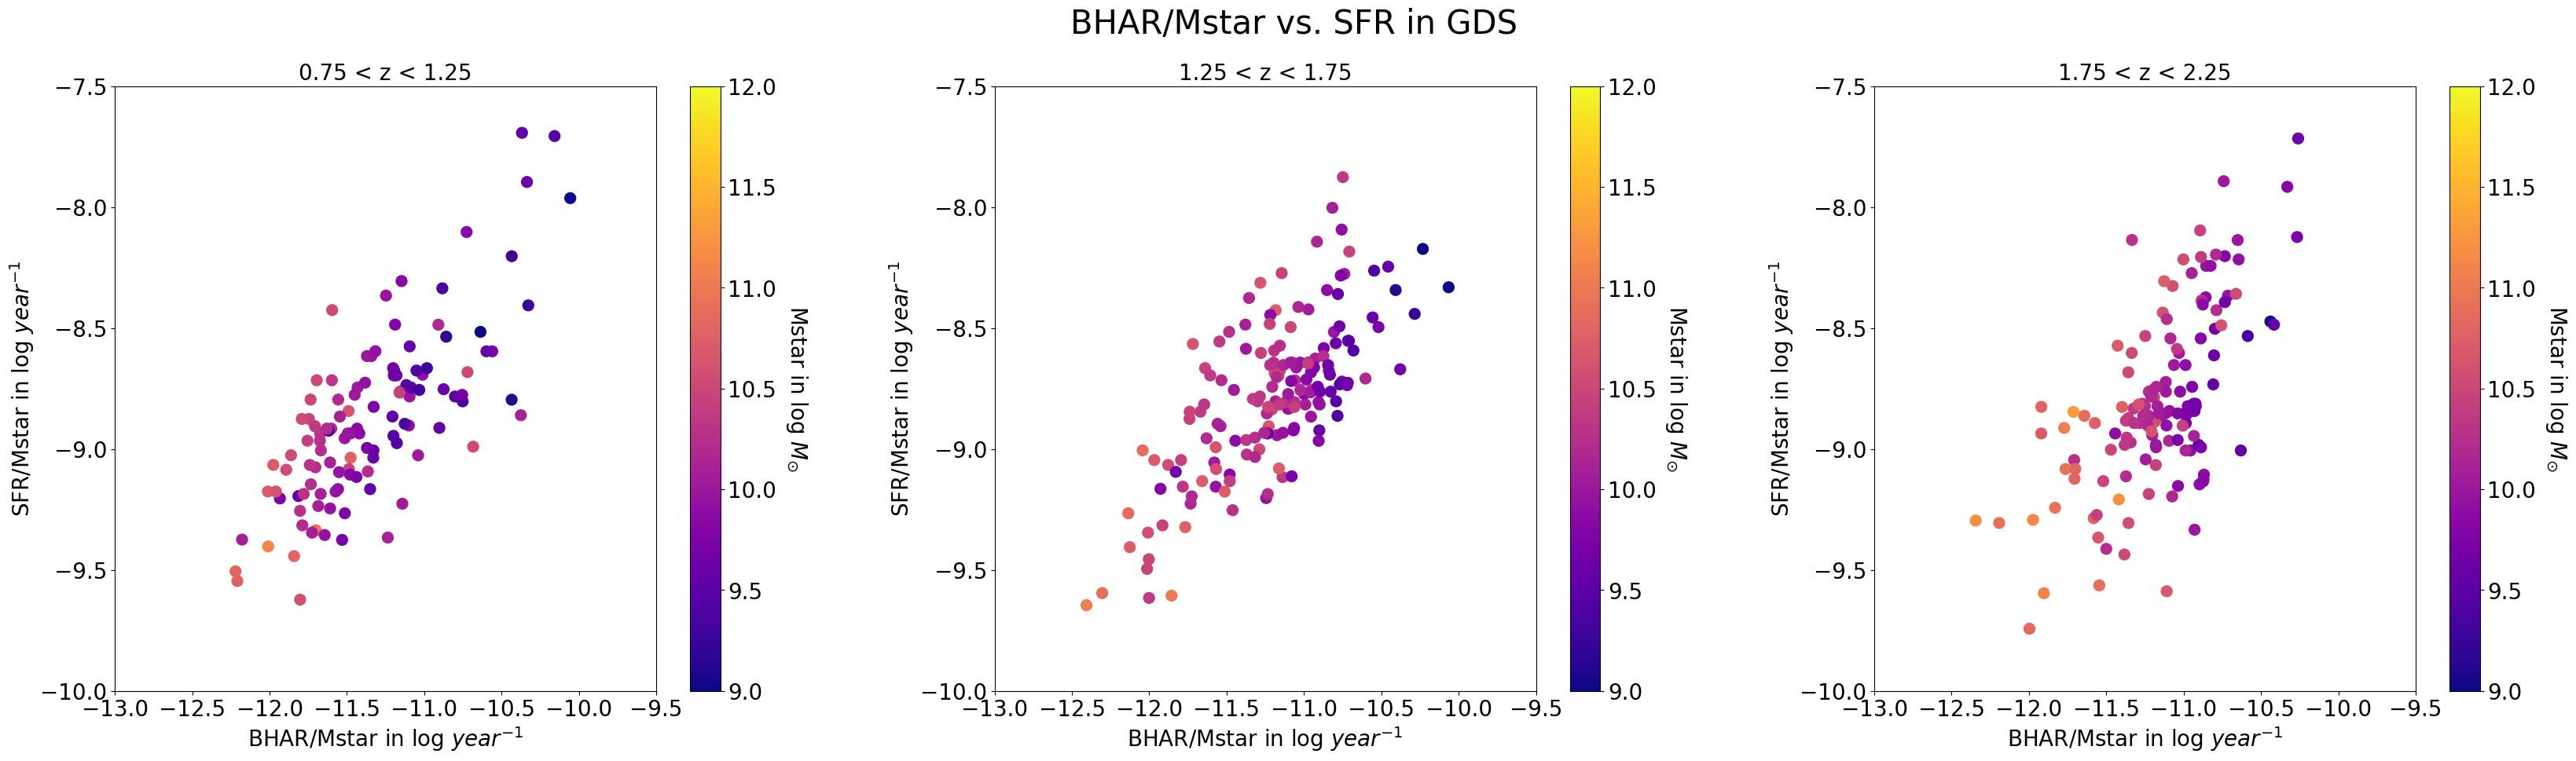

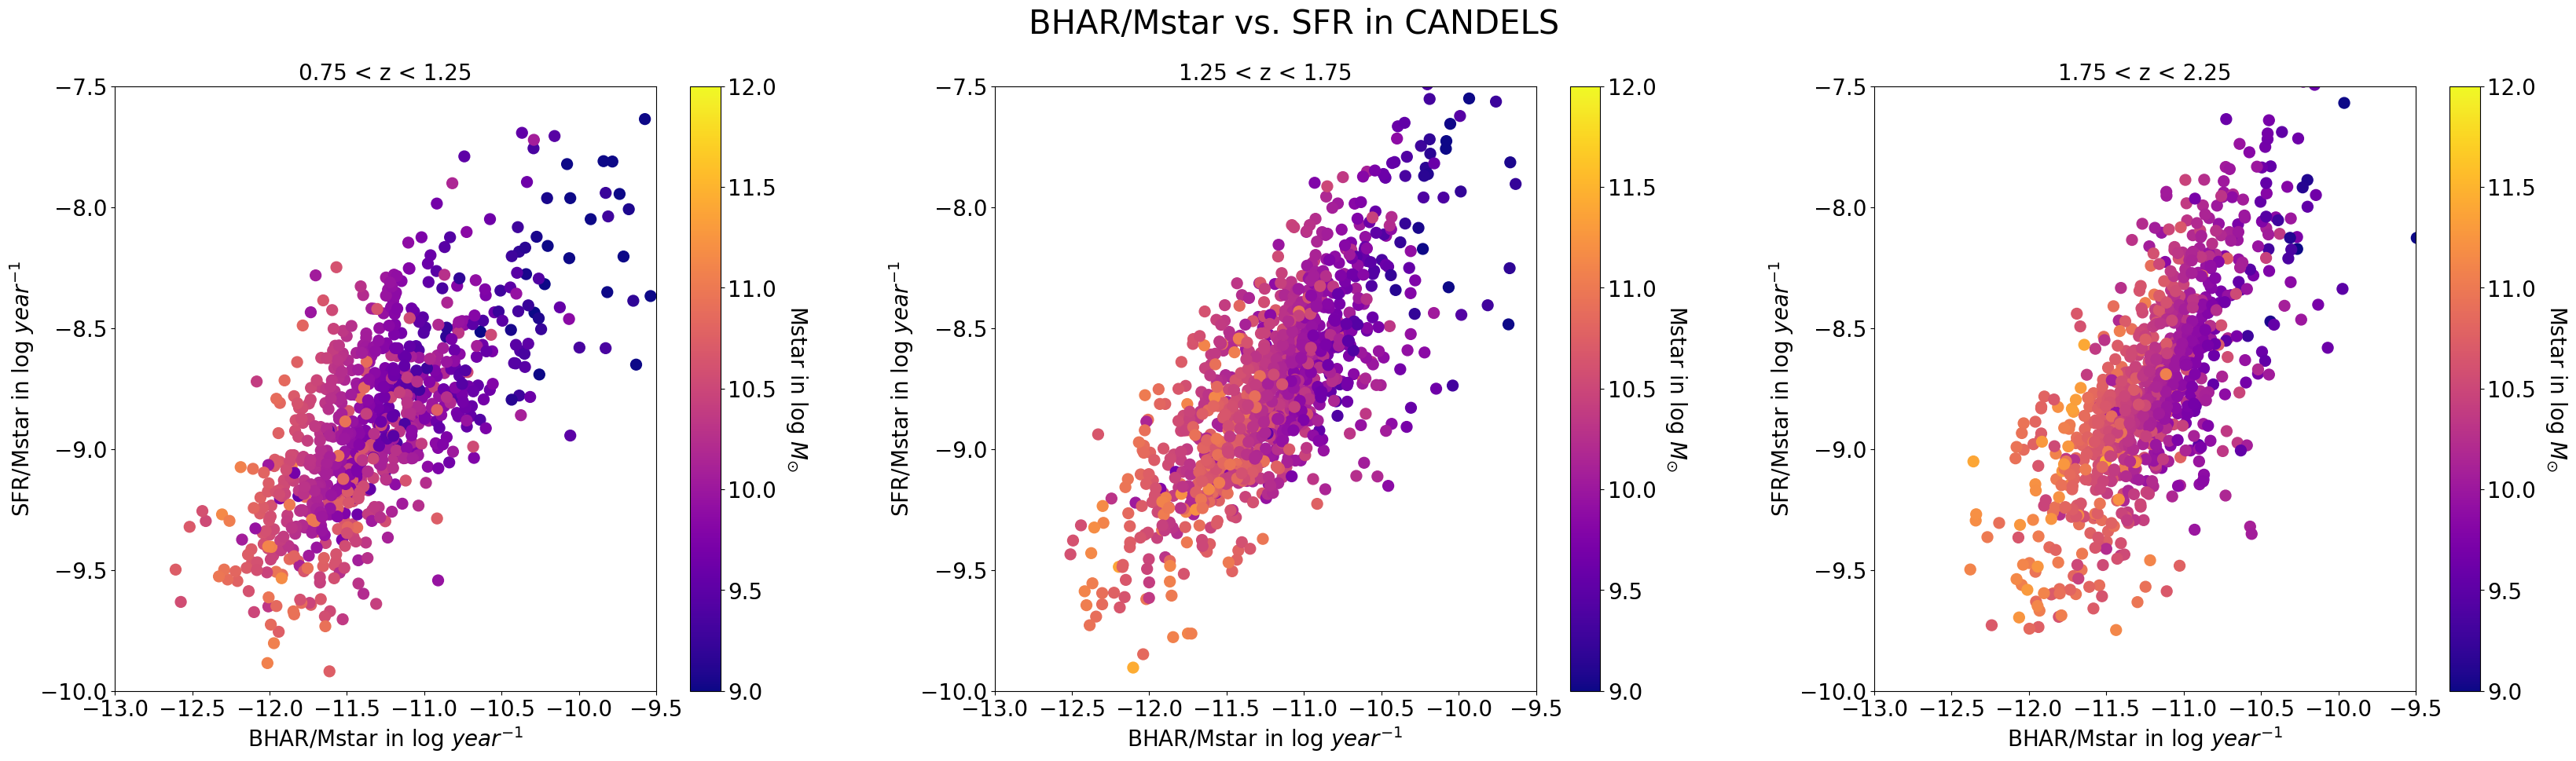

In [4]:
#------------------------SFR, BHAR scatterplots--------------------------------------

#import stuff
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
from astropy.table import Table, join
import numpy as np

%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc")
%matplotlib inline
from matplotlib import cm


#-----------------------Making the function to make graphs---------------------------
def makeFig(k, v, title, 
            x, y, color,
            xlab, ylab, cblab,
            xmin, xmax, 
            ymin, ymax, 
            cb_min, cb_max,
            file_name): 
    
    #Set up the figure
    fig = plt.figure()
    fig.set_size_inches(40,10)
    fig.suptitle(title + ' in ' + k, fontsize=30)
    
    #What table to use? 
    t = ascii.read(k +'_z.txt')
    
    #lists
    ax = []
    colorm = []
    scat = []
    cb = []
    titles = ['0.75','1.25','1.75','2.25']
    zbin = v

    for i in range(3): 
        colorm.append(None)
        scat.append(None)
        cb.append(None)

    #Setting up the grid
    for i in range(3):
        #Labels and titles
        ax.append(fig.add_subplot(1, 3, i+1))
        ax[i].set_xlabel(xlab, fontsize=20)
        ax[i].set_ylabel(ylab, fontsize=20)
        ax[i].set_title(titles[i] + ' < z < ' + titles[i+1], fontsize=20)

        #Axis limits
        ax[i].set_xlim(xmin, xmax)
        ax[i].set_ylim(ymin, ymax)
        
        #t[zbin[i]:zbin[i+1]][x]
        #The data
        colorm[i] = t[zbin[i]:zbin[i+1]][color]
        scat[i]=ax[i].scatter(t[zbin[i]:zbin[i+1]][x] - t[zbin[i]:zbin[i+1]]['M_med'], 
                              t[zbin[i]:zbin[i+1]][y] - t[zbin[i]:zbin[i+1]]['M_med'],
                              s=100,c=colorm[i],vmin=cb_min,vmax=cb_max,cmap=cm.plasma)

        cb[i] = fig.colorbar(scat[i], ax=ax[i])
        cb[i].set_label(cblab, rotation=270, labelpad=30, fontsize=20)

        #Tick mark label size
        ax[i].tick_params(axis='both', which='major', labelsize=20)
        cb[i].ax.tick_params(labelsize=20) 

    #Tune spacing between plots. 
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

    fig.savefig(k+'_'+file_name+'.png', dpi=300, bbox_inches='tight')



#----------------------------Calling the function to make graphs------------------------------------

#A dictionary of names and zbins
names = {'CANDELS': [0,812,1898,2769],
         'COS': [0,265,507, 650], 
         'EGS': [0,241,640,1015], 
         'GDS': [0,119,279,416],
         'UDS': [0,187,472,688]}


for k, v in names.items():
    #6. BHAR/Mstar vs. sSFR
    makeFig(k, v, 'BHAR/Mstar vs. SFR', 
            'BHAR', 'sfr', 'M_med',
            'BHAR/Mstar in log ${year^{-1}}$', 'SFR/Mstar in log ${year^{-1}}$', 'Mstar in log $M_{\odot}$', 
            -13, -9.5,  
            -10, -7.5,
            9, 12,
            'sBHAR_sSFR')

In [ ]:
#----------------Different figures you can make. Just copy + paste into code above.--------

names = {'CANDELS': [0,812,1898,2769],
         'COS': [0,265,507, 650], 
         'EGS': [0,241,640,1015], 
         'GDS': [0,119,279,416],
         'UDS': [0,187,472,688]}

cols = ['M_med', 'BHAR', 'sfr']

labs = ['Mstar in log $M_{\odot}$', 
            'BHAR in log $M_{\odot}$ ${year^{-1}}$', 
            'SFR in log $M_{\odot}$ ${year^{-1}}$',
            'BHAR/Mstar in log ${year^{-1}}$', 
            'Specific SFR in log ${year^{-1}}$']

file_name = ['Mstar_BHAR', 
          'Mstar_SFR', 
          'Mstar_sBHAR',
          'Mstar_sSFR',
          'sBHAR_SFR',
          'sBHAR_sSFR']

mstar_lim = [9,12]
bhar_lim = [-2.5, 0]
sfr_lim = [0,2.5]
sbhar_lim = [-13, -9.5]
ssfr_lim = [-10, -7.5]

    #1. Mstar vs. BHAR
    makeFig(k, v, 'Mstar vs. BHAR', 
            'M_med', 'BHAR', 'sfr',
            'Mstar in log $M_{\odot}$', 'BHAR in log $M_{\odot}$ ${year^{-1}}$', 'SFR in log $M_{\odot}$ ${year^{-1}}$',
            9, 12, 
            -2.5, 0, 
            0, 2.5,
            'Mstar_BHAR') 
    
    #2. Mstar vs. SFR
    makeFig(k, v, 'Mstar vs. SFR', 
            'M_med', 'sfr', 'BHAR',
            'Mstar in log $M_{\odot}$', 'SFR in log $M_{\odot}$ ${year^{-1}}$', 'BHAR in log $M_{\odot}$ ${year^{-1}}$',
            9, 12,  
            0, 2.5,
            -2.5, 0,
            'Mstar_SFR') 
    
    #3. Mstar vs. BHAR/Mstar
    makeFig(k, v, 'Mstar vs. BHAR/Mstar', 
            'M_med', 'BHAR', 'sfr',
            'Mstar in log $M_{\odot}$', 'BHAR/Mstar in log ${year^{-1}}$', 'SFR/Mstar in log ${year^{-1}}$',
            9, 12,  
            -13, -9.5,
            -10, -7.5,
            'Mstar_sBHAR') 
    
    #4. Mstar vs. sSFR
    makeFig(k, v, 'Mstar vs. BHAR/Mstar', 
            'M_med', 'sfr', 'BHAR',
            'Mstar in log $M_{\odot}$', 'SFR/Mstar in log ${year^{-1}}$', 'BHAR/Mstar in log ${year^{-1}}$',
             9, 12,  
            -10, -7.5,
            -13, -9.5,
            'Mstar_sSFR')
    
    #5. BHAR/Mstar vs. SFR
    makeFig(k, v, 'BHAR/Mstar vs. SFR', 
            'BHAR', 'sfr', 'M_med',
            'BHAR/Mstar in log ${year^{-1}}$', 'SFR in log $M_{\odot}$ ${year^{-1}}$', 'Mstar in log $M_{\odot}$', 
            -13, -9.5,  
            0,2.5,
            9, 12,
            'sBHAR_SFR') 

    #6. BHAR/Mstar vs. sSFR
    makeFig(k, v, 'BHAR/Mstar vs. SFR', 
            'BHAR', 'sfr', 'M_med',
            'BHAR/Mstar in log ${year^{-1}}$', 'SFR/Mstar in log ${year^{-1}}$', 'Mstar in log $M_{\odot}$', 
            -13, -9.5,  
            -10, -7.5,
            9, 12,
            'sBHAR_sSFR') 